<a href="https://colab.research.google.com/github/nonoumasy/Pasadena-Traffic-Collisions-2008-2017/blob/master/Pasadena_Traffic_Collisions_2008_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline
pd.set_option('display.max_rows', 1000)

In [33]:
# load data
df = pd.read_csv('https://opendata.arcgis.com/datasets/85f49ea583c24056968bee6e28162da4_0.csv')

# clean column names
df.columns = df.columns.str.lower()

# keep these columns
new_df = df[['date', 'time', 'cause', 'collisntyp', 'invwith', 'pedaction', 'injury', 'noinjured', 'nokilled', 'weather', 'lighting', 'controls', \
             'hitandrun', 'partytype1', 'partyage1', 'partysex1', 'movement1', 'safetyeq1', 'vehtype1',  'direction1']]

# dropping bad value for 'partyage1' = 248
new_df = new_df[new_df.partyage1 != 110]

#converting booleans to 0 and 1
new_df.hitandrun = new_df.hitandrun.map({'No' : 0, 'Yes' :1})

# missing values
new_df.partyage1 = new_df.partyage1.fillna(method='ffill')
new_df.time = new_df.time.fillna(method='ffill')

# convert to datetime
new_df = new_df.set_index(pd.to_datetime(new_df.date + new_df.time, format='%m/%d/%Y%H:%M:%S %p'))
new_df.drop(['date', 'time'], axis=1, inplace=True)

# convert to category type to save memory
new_df[new_df.select_dtypes(['object']).columns]= new_df.select_dtypes(include=['object']).astype('category')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (21,37,51) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
new_df.hitandrun = new_df.hitandrun.map({'No' : 0, 'Yes' :1})

In [23]:
df.head(2)

,objectid,accidno,date,time,day,street,crossst,distance,direction,x,y,injury,noinjured,nokilled,ptyatfault,cause,hitandrun,collisntyp,invwith,pedaction,pvtprop,violation,weather,roadsurf,roadcond,lighting,controls,partytype1,partyage1,partysex1,direction1,movement1,specinfo1,sobriety1,vehtype1,vehyear1,vehmake1,vehmodel1,speedlim1,damage1,safetyeq1,partytype2,partyage2,partysex2,direction2,movement2,specinfo2,sobriety2,vehtype2,vehyear2,vehmake2,vehmodel2,speedlim2,damage2,safetyeq2
0,1001,10375143901001,5/28/2008,2:39:00 PM,Wednesday,EL MOLINO AVE,CORNELL RD,100,North,6.520278e+06,1.870827e+06,Property Damage Only,0,0.0,1.0,Improper Turning,No,Hit Object,Fixed Object,No Pedestrian Involved,False,22107,Clear,NaN,NaN,Daylight,No Controls Present / Factor,Driver,80.0,Male,South,Proceeding Straight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lap/Shoulder Harness Used,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,10375152505970,5/28/2008,3:25:00 PM,Wednesday,MICHIGAN AVE,WASHINGTON BLVD,0,Not Stated,6.523659e+06,1.883920e+06,Property Damage Only,0,0.0,1.0,Auto R/W Violation,No,Sideswipe,Other Motor Vehicle,No Pedestrian Involved,False,21802,Clear,NaN,NaN,Daylight,Functioning,Driver,19.0,Female,North,Entering Traffic,NaN,NaN,Passenger Car,NaN,NaN,NaN,NaN,NaN,Lap/Shoulder Harness Used,Driver,19.0,Female,East,Proceeding Straight,NaN,NaN,Passenger Car,NaN,NaN,NaN,NaN,NaN,Lap/Shoulder Harness Used


# Pandas Profiling


In [0]:
ProfileReport(new_df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,17031
Total Missing (%),2.2%
Total size in memory,1.9 MiB
Average record size in memory,120.0 B
Numeric,3
Categorical,12
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# EDA

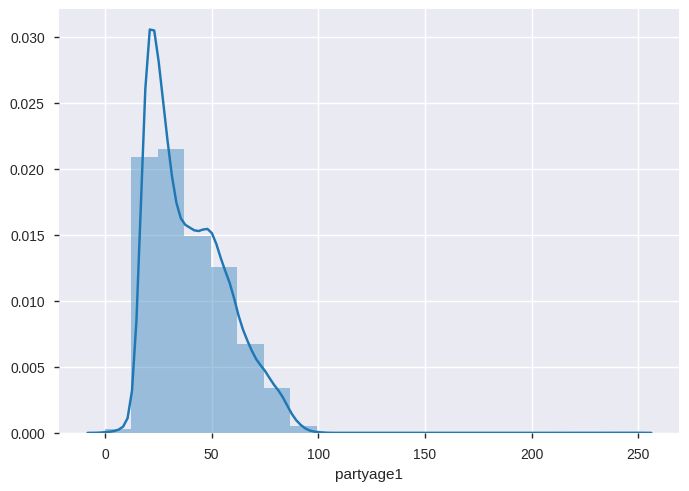

In [0]:
# age distribution of driver
sns.distplot(new_df.partyage1, bins=20)

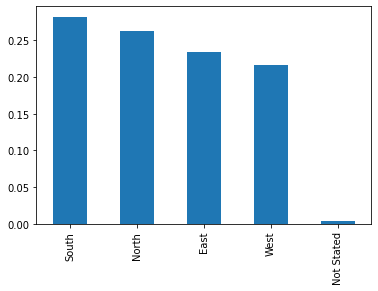

In [0]:
# direction
new_df[new_df.noinjured <= 2]['direction1'].value_counts(normalize=True).plot(kind='bar')

In [45]:
import holidays

# analyze holiday incidents
new_df['is_holiday'] = 0
for i, idx in enumerate(new_df.index.date):
  new_df['is_holiday'][i] = idx in holidays.US()

new_df.is_holiday.value_counts(normalize=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    0.975457
1    0.024543
Name: is_holiday, dtype: float64

In [0]:
# summary statistics when there is an injury of 4 or more
new_df[new_df.noinjured <= 2].describe(include='category')

,cause,collisntyp,invwith,pedaction,injury,weather,lighting,controls,hitandrun,partytype1,partysex1,movement1,safetyeq1,vehtype1,direction1
count,16472,16514,16514,16500,16508,16513,16514,16503,16514,16512,15262,16437,14349,12411,16391
unique,25,9,12,8,5,8,6,6,3,5,3,20,22,17,5
top,Unsafe Speed,Broadside,Other Motor Vehicle,No Pedestrian Involved,Property Damage Only,Clear,Daylight,Functioning,No,Driver,Male,Proceeding Straight,Lap/Shoulder Harness Used,Passenger Car,South
freq,2936,6335,12079,13097,10727,11892,10205,9109,14657,15896,7100,8266,10614,9850,4632


0    10739
1     4581
2     1194
3      350
4      118
5       31
6       12
7        5
9        1
Name: noinjured, dtype: int64
0    0.630556
1    0.268980
2    0.070107
3    0.020551
4    0.006929
5    0.001820
6    0.000705
7    0.000294
9    0.000059
Name: noinjured, dtype: float64


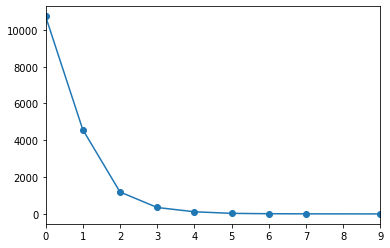

In [0]:
print(new_df.noinjured.value_counts())
print(new_df.noinjured.value_counts(normalize=True))
new_df.noinjured.value_counts().plot(kind='line', marker='o')


Unsafe Speed                  0.179196
Unknown                       0.169012
Auto R/W Violation            0.165067
Improper Turning              0.128687
Traffic Signals and Signs     0.128216
Unsafe Starting or Backing    0.042209
Driving Under Influence       0.033261
Unsafe Lane Change            0.029905
Following Too Closely         0.024195
Pedestrian Violation          0.023194
Ped R/W Violation             0.018838
Wrong Side of Road            0.016542
Other Hazardous Movement      0.015718
Improper Passing              0.008065
Other Than Driver             0.007476
Other Improper Driving        0.003826
Not Stated                    0.002885
Other                         0.002767
Hazardous Parking             0.000353
Impeding Traffic              0.000235
Brakes                        0.000118
Other Equipment               0.000059
Fell Asleep                   0.000059
Lights                        0.000059
Other Than Driver or Ped      0.000059
Name: cause, dtype: float

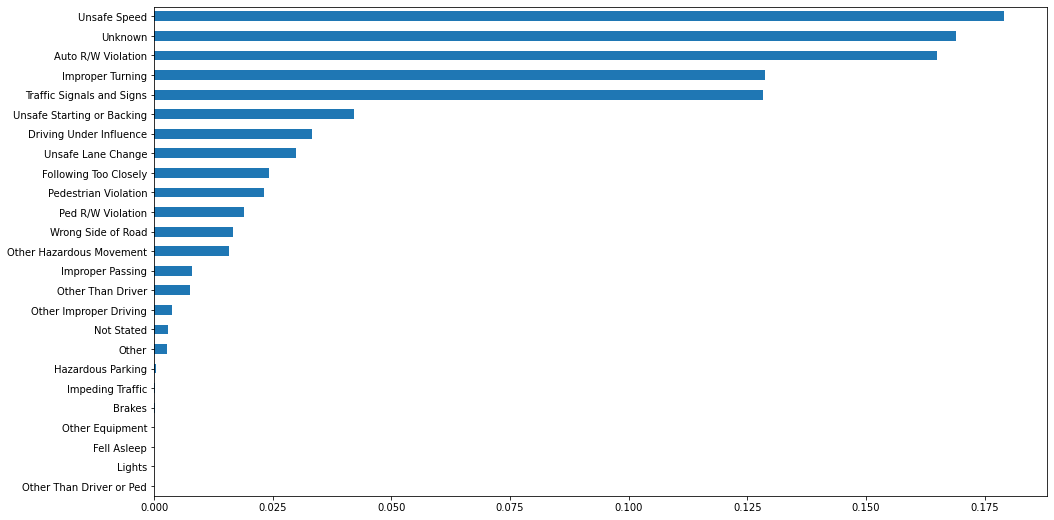

In [114]:
print(df.cause.value_counts(normalize=True))
df.cause.value_counts(normalize=True)[::-1].plot(kind='barh', figsize=(16,9))

In [0]:

new_df[new_df.noinjured >= 1]['cause'].value_counts(normalize=True)

Auto R/W Violation            0.238604
Unsafe Speed                  0.198916
Traffic Signals and Signs     0.194613
Improper Turning              0.099139
Pedestrian Violation          0.052279
Ped R/W Violation             0.047657
Driving Under Influence       0.029806
Wrong Side of Road            0.026140
Following Too Closely         0.022952
Unsafe Starting or Backing    0.018170
Other Hazardous Movement      0.017851
Unsafe Lane Change            0.015461
Unknown                       0.013389
Other Than Driver             0.007491
Improper Passing              0.006057
Other                         0.003985
Other Improper Driving        0.003507
Not Stated                    0.003028
Impeding Traffic              0.000478
Other Than Driver or Ped      0.000159
Lights                        0.000159
Brakes                        0.000159
Name: cause, dtype: float64

Broadside               0.389760
Rear-End                0.234161
Sideswipe               0.184252
Head-On                 0.061300
Hit Object              0.056250
Vehicle - Pedestrian    0.034056
Not Stated              0.022547
Other                   0.013446
Overturned              0.004228
Name: collisntyp, dtype: float64


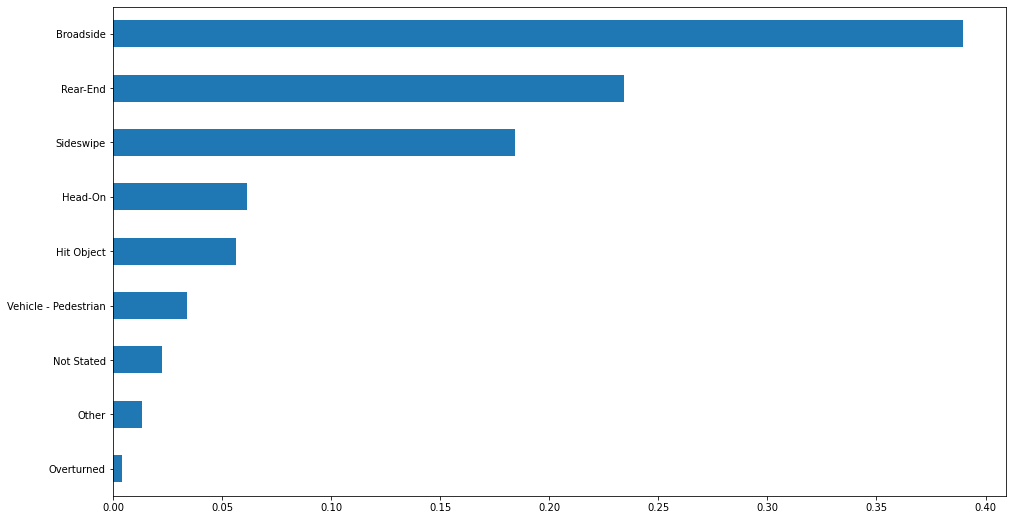

In [115]:
print(new_df.collisntyp.value_counts(normalize=True))
new_df.collisntyp.value_counts(normalize=True)[::-1].plot(kind='barh', figsize=(16,9));

Proceeding Straight                       0.506814
Making Left Turn                          0.199339
Making Right Turn                         0.060232
Entering Traffic                          0.049083
Changing Lanes                            0.042534
Backing                                   0.037520
Making U Turn                             0.014925
Other Unsafe Turning                      0.012566
Slowing/Stopping                          0.012448
Other                                     0.011091
Stopped In Road                           0.010265
Passing Other Vehicle                     0.008613
Parking Maneuver                          0.008200
Parked                                    0.007433
Ran Off Road                              0.006017
Traveling Wrong Way                       0.003363
Not Stated                                0.003127
Crossed Into Opposing Lane - Unplanned    0.002773
Merging                                   0.002655
Not Applicable - Ped           

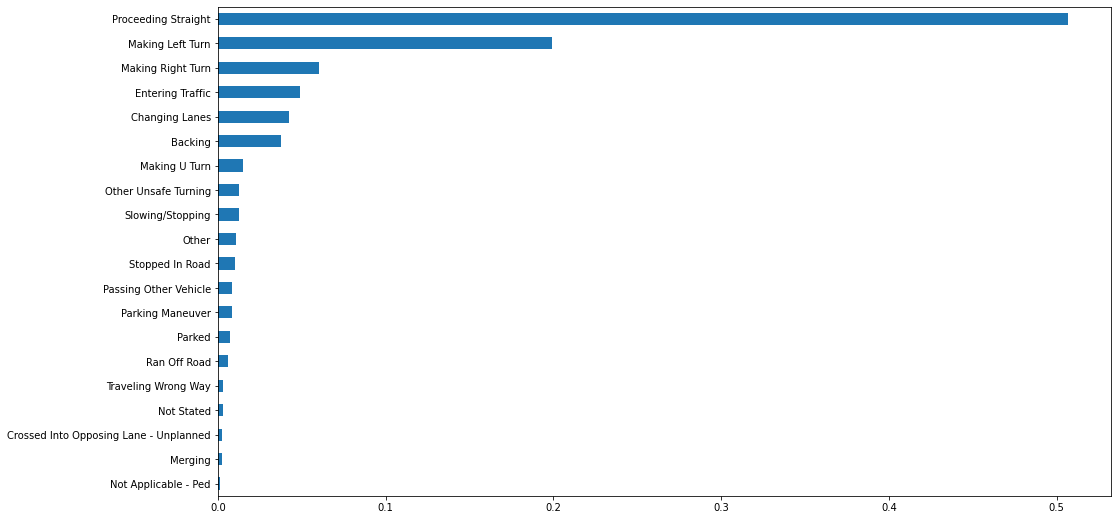

In [116]:
print(new_df['movement1'].value_counts(normalize=True))
new_df['movement1'].value_counts(normalize=True)[::-1].plot(kind='barh', figsize=(16,9))

Property Damage Only    0.630073
Complaint of Pain       0.240411
Other Visible Injury    0.116769
Severe Injury           0.010220
Fatal                   0.002526
Name: injury, dtype: float64


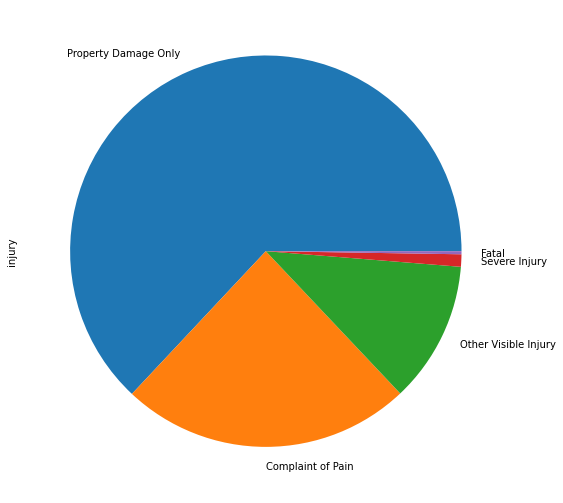

In [117]:
print(new_df['injury'].value_counts(normalize=True))
new_df['injury'].value_counts(normalize=True).plot(kind='pie', figsize=(16,9))

In [0]:
new_df[(new_df.noinjured >= 1) & (new_df.collisntyp == 'Broadside')]['cause'].value_counts(normalize=True)

Auto R/W Violation            0.391008
Traffic Signals and Signs     0.365123
Improper Turning              0.084128
Pedestrian Violation          0.045981
Wrong Side of Road            0.032016
Other Hazardous Movement      0.015668
Unsafe Speed                  0.014305
Driving Under Influence       0.011921
Ped R/W Violation             0.009537
Unknown                       0.008856
Unsafe Starting or Backing    0.006812
Improper Passing              0.003747
Other                         0.003747
Unsafe Lane Change            0.003406
Following Too Closely         0.001022
Not Stated                    0.000681
Other Than Driver             0.000681
Other Improper Driving        0.000681
Brakes                        0.000341
Lights                        0.000341
Name: cause, dtype: float64

Daylight                                0.620574
Dark - Street Lights                    0.194058
Not Stated                              0.152017
Dusk - Dawn                             0.027773
Dark - No Street Lights                 0.004932
Dark - Street Lights Not Functioning    0.000646
Name: lighting, dtype: float64


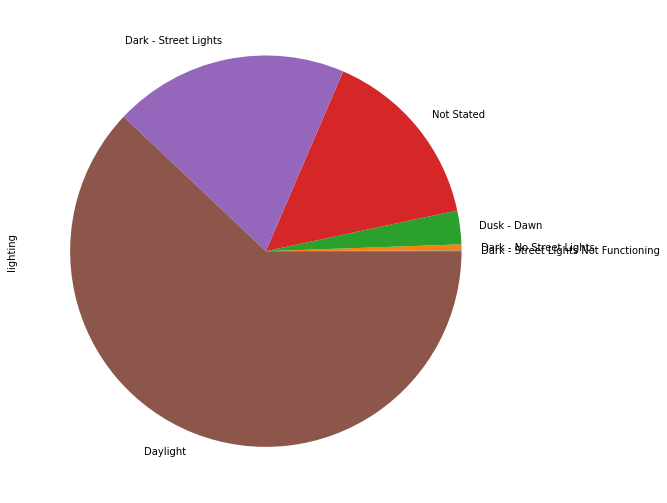

In [118]:
print(new_df['lighting'].value_counts(normalize=True))
new_df['lighting'].value_counts(normalize=True)[::-1].plot(kind='pie', figsize=(16,9))

Clear         0.723840
Not Stated    0.151380
Cloudy        0.091309
Raining       0.032179
Other         0.000587
Fog           0.000352
Wind          0.000294
Snowing       0.000059
Name: weather, dtype: float64


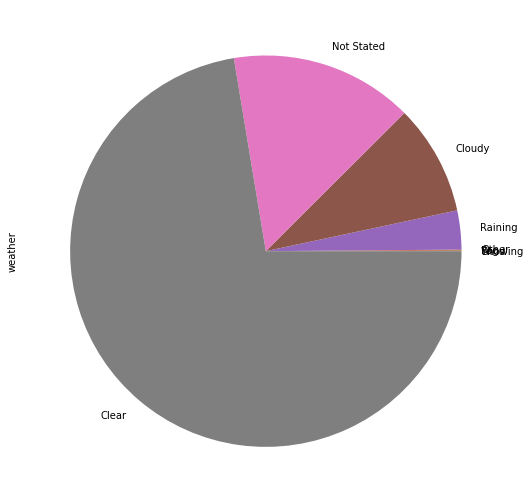

In [119]:
print(new_df['weather'].value_counts(normalize=True))
new_df['weather'].value_counts(normalize=True)[::-1].plot(kind='pie', figsize=(16,9))

In [66]:
new_df['invwith'].value_counts(normalize=True)

Other Motor Vehicle               0.737596
Parked Motor Vehicle              0.083906
Fixed Object                      0.075862
Pedestrian                        0.043274
Bicycle                           0.042100
Motor Vehicle on Other Roadway    0.004639
Other Object                      0.004462
Non-Collision                     0.004110
Not Stated                        0.002760
Other                             0.000528
Train                             0.000470
Animal                            0.000294
Name: invwith, dtype: float64

In [69]:
new_df.head(2)

,cause,collisntyp,invwith,pedaction,injury,noinjured,nokilled,weather,lighting,controls,hitandrun,partytype1,partyage1,partysex1,movement1,safetyeq1,vehtype1,direction1,is_holiday
2008-05-28 02:39:00,Improper Turning,Hit Object,Fixed Object,No Pedestrian Involved,Property Damage Only,0,0.0,Clear,Daylight,No Controls Present / Factor,0.0,Driver,80.0,Male,Proceeding Straight,Lap/Shoulder Harness Used,NaN,South,0
2008-05-28 03:25:00,Auto R/W Violation,Sideswipe,Other Motor Vehicle,No Pedestrian Involved,Property Damage Only,0,0.0,Clear,Daylight,Functioning,0.0,Driver,19.0,Female,Entering Traffic,Lap/Shoulder Harness Used,Passenger Car,North,0


In [90]:
# df with collisions with atleast 1 death
killed1_df = new_df[new_df.nokilled >= 1].dropna() 

# cause vs collision type
pd.crosstab(index=killed1_df.cause , columns=killed1_df.collisntyp, values=killed1_df.noinjured, aggfunc='sum').style.background_gradient(axis=1)

collisntyp,Broadside,Head-On,Hit Object,Not Stated,Overturned,Rear-End,Sideswipe,Vehicle - Pedestrian
cause,,,,,,,,
Auto R/W Violation,0,3,nan,nan,nan,nan,nan,1
Driving Under Influence,1,2,2,nan,0,nan,nan,nan
Improper Turning,nan,3,nan,nan,nan,nan,nan,nan
Other,nan,nan,nan,nan,nan,nan,nan,0
Other Than Driver,nan,0,nan,nan,nan,nan,nan,nan
Pedestrian Violation,2,nan,nan,nan,nan,nan,nan,1
Traffic Signals and Signs,3,nan,nan,nan,nan,nan,nan,nan
Unknown,3,nan,nan,0,nan,nan,nan,nan
Unsafe Speed,1,0,nan,nan,nan,0,1,0


In [89]:
# df with collisions with atleast 1 injury
inj1_df = new_df[new_df.noinjured >= 1].dropna() 

# cause vs collision type
pd.crosstab(index=inj1_df.cause , columns=inj1_df.collisntyp, values=inj1_df.noinjured, aggfunc='sum').style.background_gradient(axis=1)

collisntyp,Broadside,Head-On,Hit Object,Not Stated,Other,Overturned,Rear-End,Sideswipe,Vehicle - Pedestrian
cause,,,,,,,,,
Auto R/W Violation,1500,268,9,47,16,2,12,60,14
Brakes,1,nan,nan,nan,nan,nan,nan,nan,nan
Driving Under Influence,54,29,31,1,3,9,70,23,3
Following Too Closely,2,nan,nan,2,nan,nan,138,1,nan
Impeding Traffic,nan,nan,nan,nan,nan,nan,5,nan,nan
Improper Passing,10,nan,nan,nan,nan,nan,2,15,2
Improper Turning,274,59,46,20,10,3,58,152,12
Not Stated,1,1,4,5,nan,nan,5,4,nan
Other,13,7,nan,nan,nan,nan,2,3,1


In [92]:
# number of fatalities involving pedestrians
new_df[(new_df.nokilled >= 1)]['invwith'].value_counts()

Other Motor Vehicle               17
Pedestrian                        10
Fixed Object                       9
Bicycle                            5
Parked Motor Vehicle               2
Other Object                       1
Non-Collision                      1
Train                              0
Other                              0
Not Stated                         0
Motor Vehicle on Other Roadway     0
Animal                             0
Name: invwith, dtype: int64

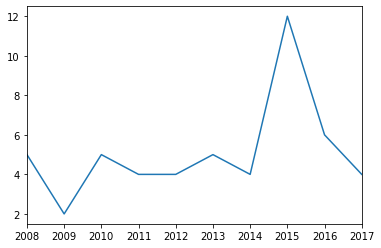

In [110]:
# fatalities by year
new_df.groupby(new_df.index.year)['nokilled'].sum()

In [112]:
# injuries by year
new_df.groupby(new_df.index.year)['noinjured'].sum()

2008    1008
2009    1004
2010     885
2011     851
2012     930
2013     789
2014     992
2015     857
2016     606
2017     840
Name: noinjured, dtype: int64

In [0]:
new_df[new_df.noinjured >= 1]['hitandrun'].value_counts(normalize=True)

No             0.942943
Felony         0.035601
Misdemeanor    0.021456
Name: hitandrun, dtype: float64

# Observations

1. The year with the highest number of fatalities was 2015 with 12 fatalities
2. The year with the lowest number of fatalities was 2009 with 2 fatalities
3. The year with highest number of injuries from collisions was 2008 with 1008 injuries.
4. The year with the lowest number of injuries was 2016 with 606 fatalities.
5. The number of injuries per year is trending down.
6. The direction in which the vehicles were heading when they had the collision shows no pattern. It is a uniform distribution for North, South, West and East directions.
7. 2.4% of the Collisions happened on a holiday.
8. The most frequent cause of collision is ‘Unsafe Speed’ (18%), followed by Right of way violation(17%).
9. The most frequent type of collision is ‘Broadside’ (39%) followed by ‘Rear-End’ (23%).
10. The most frequent type of movement is ‘Proceeding Straight’ (50%) followed by ‘Making Left Turn’ (20%).
11. The most frequent injury type is ‘Property Damage’ (63%) followed by ‘Complaint of Pain’ (24%).
12. Collisions happened during daylight 62% of the time followed during nighttime with street lights 19% of the time.
13. Collisions happened during ‘Clear’ weather conditions at 72% of the time followed by ‘Cloudy’ conditions at 9% of the time.
14. 73% of the time, the collisions involved other Motor Vehicles and 8% of the time, involved Parked Motor Vehicles.
15. 




# References

1. http://data.cityofpasadena.net/datasets/85f49ea583c24056968bee6e28162da4_0

# Geospatial


Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.7.0)


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



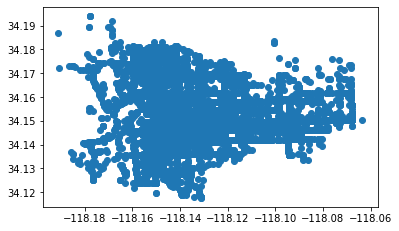

In [121]:
!pip install -U geopandas

import geopandas as gpd

gdf = gpd.read_file('/content/Traffic_Collisions.csv', )

gdf.X = pd.to_numeric(gdf.X)
gdf.Y = pd.to_numeric(gdf.Y)

new_gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf['X'], gdf['Y']))

new_gdf.crs = {'init' :'epsg:2229'}

new_gdf = new_gdf.to_crs(epsg=4326)

new_gdf.plot()

In [122]:
new_gdf.head(2)

,OBJECTID,Accidno,Date,Time,Day,Street,CrossSt,Distance,Direction,X,Y,Injury,NoInjured,NoKilled,PtyAtFault,Cause,HitAndRun,CollisnTyp,InvWith,PedAction,PvtProp,Violation,Weather,RoadSurf,RoadCond,Lighting,Controls,PartyType1,PartyAge1,PartySex1,Direction1,Movement1,SpecInfo1,Sobriety1,VehType1,VehYear1,VehMake1,VehModel1,SpeedLim1,Damage1,SafetyEq1,PartyType2,PartyAge2,PartySex2,Direction2,Movement2,SpecInfo2,Sobriety2,VehType2,VehYear2,VehMake2,VehModel2,SpeedLim2,Damage2,SafetyEq2,geometry
0,1001,10375143901001,5/28/2008,2:39:00 PM,Wednesday,EL MOLINO AVE,CORNELL RD,100,North,6.520278e+06,1.870827e+06,Property Damage Only,0,0,1,Improper Turning,No,Hit Object,Fixed Object,No Pedestrian Involved,False,22107,Clear,,,Daylight,No Controls Present / Factor,Driver,80,Male,South,Proceeding Straight,,,,,,,,,Lap/Shoulder Harness Used,,,,,,,,,,,,,,,POINT (-118.13677 34.13304)
1,1002,10375152505970,5/28/2008,3:25:00 PM,Wednesday,MICHIGAN AVE,WASHINGTON BLVD,0,Not Stated,6.523659e+06,1.883920e+06,Property Damage Only,0,0,1,Auto R/W Violation,No,Sideswipe,Other Motor Vehicle,No Pedestrian Involved,False,21802,Clear,,,Daylight,Functioning,Driver,19,Female,North,Entering Traffic,,,Passenger Car,,,,,,Lap/Shoulder Harness Used,Driver,19,Female,East,Proceeding Straight,,,Passenger Car,,,,,,Lap/Shoulder Harness Used,POINT (-118.12565 34.16903)
